In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter


In [2]:
# Load dataset
df_original = pd.read_csv('./processed_datasets/dataset_preprocessed.csv')
# View the first 10 rows
df_original.head(10)

,index,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI Category
0,0,0,0,1,1,-2.127247,1,0,0,0,...,0,5,10,20,0,0,11,4,5,0
1,1,2,1,0,1,-0.170425,0,0,1,0,...,0,2,0,0,0,0,11,4,3,2
2,2,2,1,1,1,0.582198,0,0,0,1,...,0,2,10,0,0,0,9,4,7,3
3,3,2,0,1,1,-0.019901,0,1,1,1,...,0,5,0,30,1,1,12,3,4,2
4,4,0,0,0,1,-0.772524,1,0,0,0,...,0,3,0,0,1,1,13,5,6,1
5,5,0,1,0,1,1.635872,1,0,0,1,...,0,3,5,25,1,0,10,4,8,5
6,6,0,1,1,1,-0.320950,1,0,0,0,...,0,4,25,0,0,0,10,5,3,2
7,7,2,0,0,1,-0.772524,0,0,1,0,...,0,4,0,0,0,1,12,6,7,1
8,8,0,1,1,1,0.130624,0,0,0,0,...,0,2,0,0,0,0,7,4,6,3
9,9,0,1,1,1,1.033773,1,0,0,0,...,0,4,0,0,0,1,10,4,8,4


In [3]:
# Drop the index column. It's useless
df_original = df_original.drop('index', axis=1)
# View the first 10 rows
df_original.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI Category
0,0,0,1,1,-2.127247,1,0,0,0,1,...,0,5,10,20,0,0,11,4,5,0
1,2,1,0,1,-0.170425,0,0,1,0,1,...,0,2,0,0,0,0,11,4,3,2
2,2,1,1,1,0.582198,0,0,0,1,1,...,0,2,10,0,0,0,9,4,7,3
3,2,0,1,1,-0.019901,0,1,1,1,1,...,0,5,0,30,1,1,12,3,4,2
4,0,0,0,1,-0.772524,1,0,0,0,0,...,0,3,0,0,1,1,13,5,6,1
5,0,1,0,1,1.635872,1,0,0,1,1,...,0,3,5,25,1,0,10,4,8,5
6,0,1,1,1,-0.320950,1,0,0,0,0,...,0,4,25,0,0,0,10,5,3,2
7,2,0,0,1,-0.772524,0,0,1,0,0,...,0,4,0,0,0,1,12,6,7,1
8,0,1,1,1,0.130624,0,0,0,0,1,...,0,2,0,0,0,0,7,4,6,3
9,0,1,1,1,1.033773,1,0,0,0,0,...,0,4,0,0,0,1,10,4,8,4


# SMOTE

In [4]:
# Split dataset into features (X) and target (y)
X = df_original.drop(columns=['Diabetes_012'])
y = df_original['Diabetes_012']

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution after SMOTE: Counter({0: 184542, 2: 184542, 1: 184542})


In [5]:
# Construct the new dataset after data augmenttion with SMOTE
df = X_smote
df['Diabetes_012'] = y_smote
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI Category,Diabetes_012
0,0,1,1,-2.127247,1,0,0,0,1,1,...,5,10,20,0,0,11,4,5,0,0
1,1,0,1,-0.170425,0,0,1,0,1,0,...,2,0,0,0,0,11,4,3,2,2
2,1,1,1,0.582198,0,0,0,1,1,1,...,2,10,0,0,0,9,4,7,3,2
3,0,1,1,-0.019901,0,1,1,1,1,1,...,5,0,30,1,1,12,3,4,2,2
4,0,0,1,-0.772524,1,0,0,0,0,0,...,3,0,0,1,1,13,5,6,1,0


## Visualize distribution after data augmentation

In [6]:
# Define the function responsible for plotting the distribution of the target per feature
def plot_target_distribution_per_feature(feature):
    # Create a crosstab table to see the distribution of diabetes across the feature
    diabetes_bp_crosstab = pd.crosstab(df[feature], df["Diabetes_012"], margins=False)
    colors = ['mediumpurple', 'pink' , "lightblue"]

    # 1. Bar chart (stacked)
    plt.figure(figsize=(8, 6))
    diabetes_bp_crosstab.plot(kind="bar", stacked=True, color=colors)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of Diabetes By {feature}")
    plt.legend(title="Diabetes", labels=["No Diabetes", "Prediabetes", "Diabetes"])
    plt.show()

<Figure size 800x600 with 0 Axes>

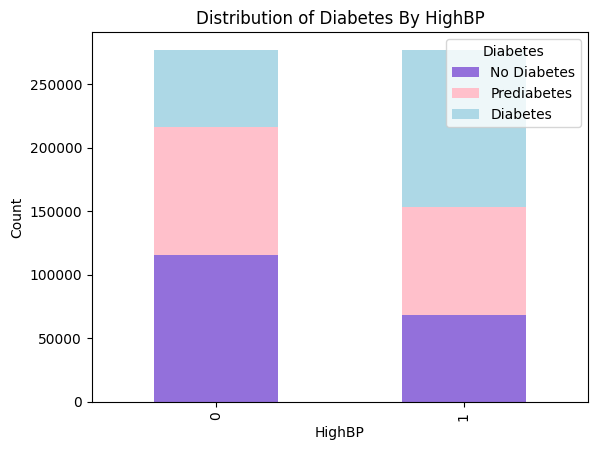

In [7]:
plot_target_distribution_per_feature("HighBP")

<Figure size 800x600 with 0 Axes>

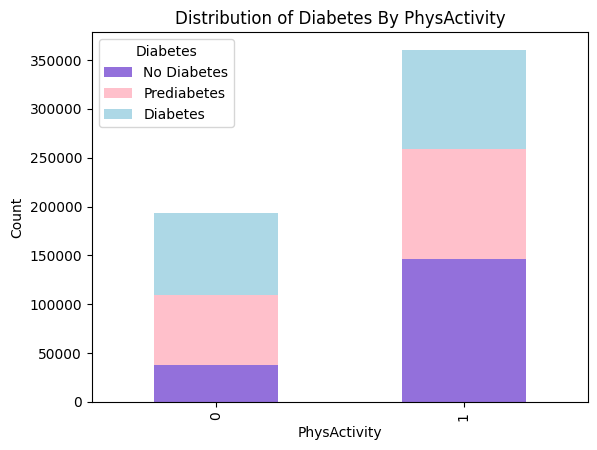

In [8]:
plot_target_distribution_per_feature("PhysActivity")

<Figure size 800x600 with 0 Axes>

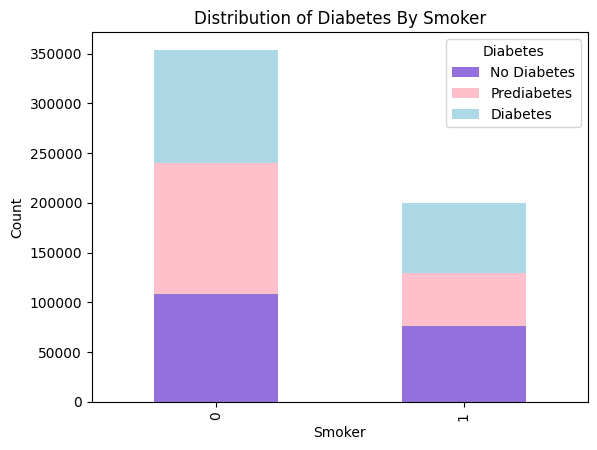

In [9]:
plot_target_distribution_per_feature("Smoker")

<Figure size 800x600 with 0 Axes>

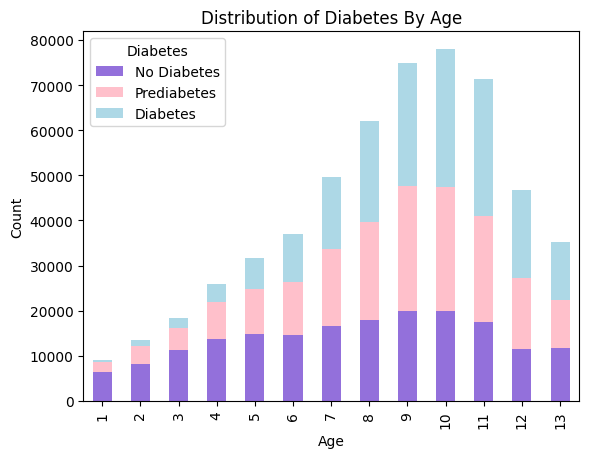

In [10]:
plot_target_distribution_per_feature("Age")

<Figure size 800x600 with 0 Axes>

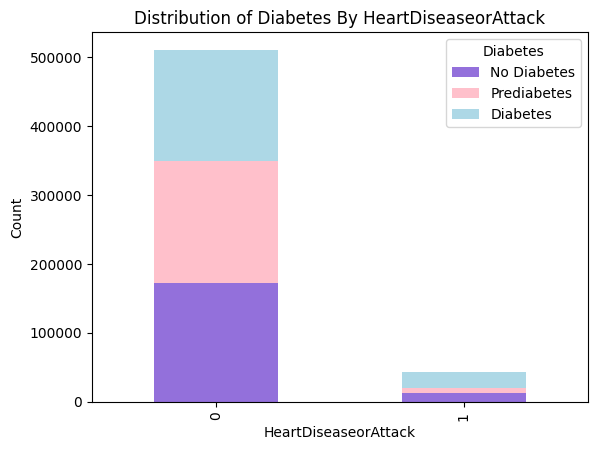

In [11]:
plot_target_distribution_per_feature("HeartDiseaseorAttack")

<Figure size 800x600 with 0 Axes>

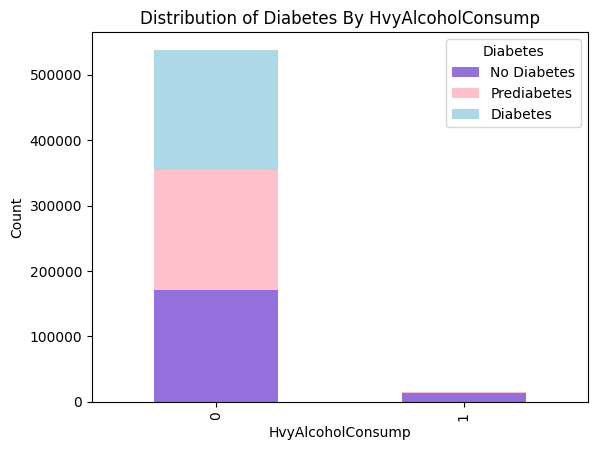

In [12]:
plot_target_distribution_per_feature("HvyAlcoholConsump")

<Figure size 800x600 with 0 Axes>

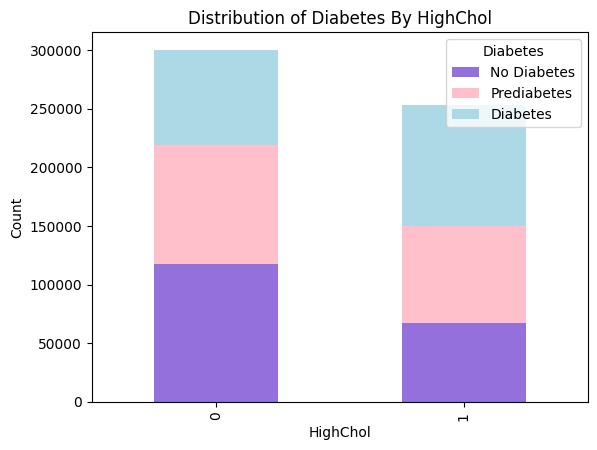

In [13]:
plot_target_distribution_per_feature("HighChol")

In [14]:
# Save the SMOTE dataset
df.to_csv("./processed_datasets/dataset_preprocessed_smote.csv", index=False)

# ADASYN

In [15]:
# Apply ADASYN to balance the training set
ada = ADASYN(random_state=42)
adaX, aday = ada.fit_resample(X, y)


# Check class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(adaX))

Class distribution after ADASYN: Counter({'HighBP': 1, 'HighChol': 1, 'CholCheck': 1, 'BMI': 1, 'Smoker': 1, 'Stroke': 1, 'HeartDiseaseorAttack': 1, 'PhysActivity': 1, 'Fruits': 1, 'Veggies': 1, 'HvyAlcoholConsump': 1, 'AnyHealthcare': 1, 'NoDocbcCost': 1, 'GenHlth': 1, 'MentHlth': 1, 'PhysHlth': 1, 'DiffWalk': 1, 'Sex': 1, 'Age': 1, 'Education': 1, 'Income': 1, 'BMI Category': 1})


In [16]:
# Construct the new dataset after data augmenttion with ADASYN
df = adaX
df['Diabetes_012'] = aday
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI Category,Diabetes_012
0,0,1,1,-2.127247,1,0,0,0,1,1,...,5,10,20,0,0,11,4,5,0,0
1,1,0,1,-0.170425,0,0,1,0,1,0,...,2,0,0,0,0,11,4,3,2,2
2,1,1,1,0.582198,0,0,0,1,1,1,...,2,10,0,0,0,9,4,7,3,2
3,0,1,1,-0.019901,0,1,1,1,1,1,...,5,0,30,1,1,12,3,4,2,2
4,0,0,1,-0.772524,1,0,0,0,0,0,...,3,0,0,1,1,13,5,6,1,0


## Visualize distribution after data augmentation

In [17]:
# Define the function responsible for plotting the distribution of the target per feature
def plot_target_distribution_per_feature(feature):
    # Create a crosstab table to see the distribution of diabetes across the feature
    diabetes_bp_crosstab = pd.crosstab(df[feature], df["Diabetes_012"], margins=False)
    colors = ['mediumpurple', 'pink' , "lightblue"]

    # 1. Bar chart (stacked)
    plt.figure(figsize=(8, 6))
    diabetes_bp_crosstab.plot(kind="bar", stacked=True, color=colors)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of Diabetes By {feature}")
    plt.legend(title="Diabetes", labels=["No Diabetes", "Prediabetes", "Diabetes"])
    plt.show()

<Figure size 800x600 with 0 Axes>

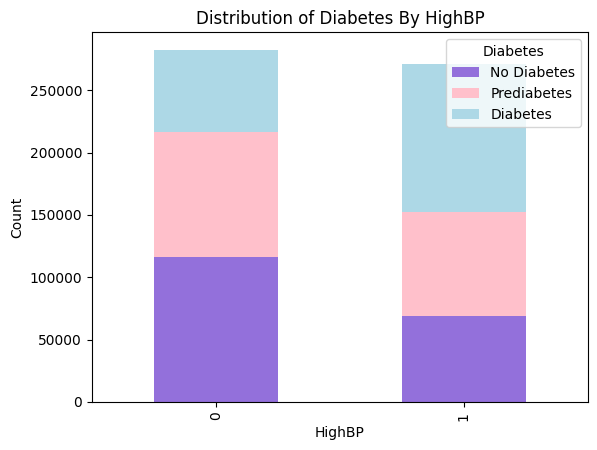

In [18]:
plot_target_distribution_per_feature("HighBP")

<Figure size 800x600 with 0 Axes>

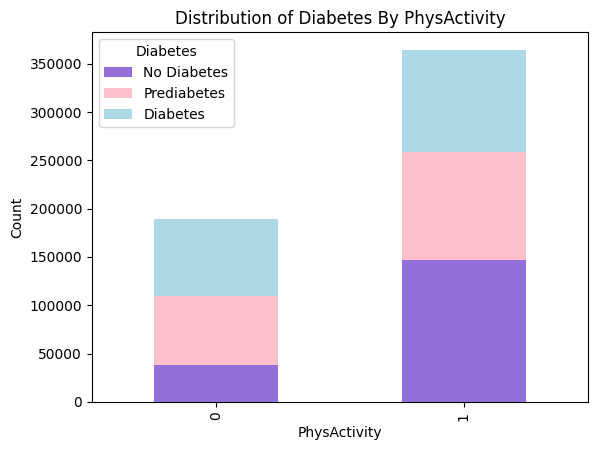

In [19]:
plot_target_distribution_per_feature("PhysActivity")

<Figure size 800x600 with 0 Axes>

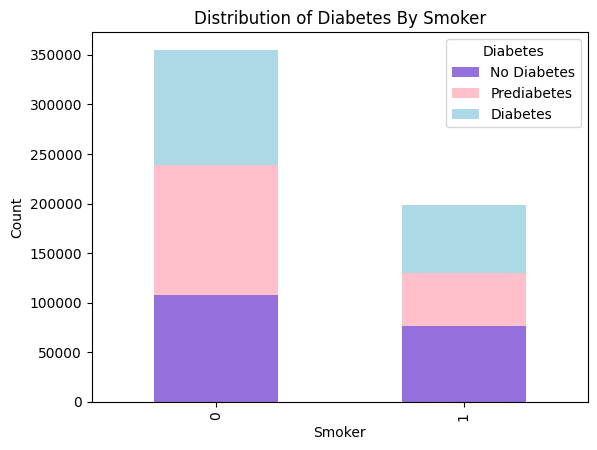

In [20]:
plot_target_distribution_per_feature("Smoker")

<Figure size 800x600 with 0 Axes>

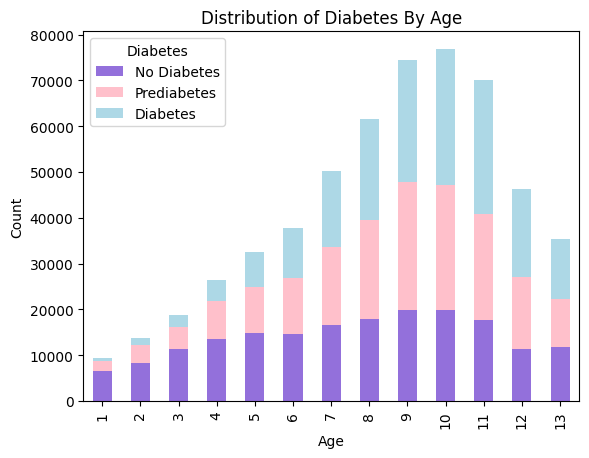

In [21]:
plot_target_distribution_per_feature("Age")

<Figure size 800x600 with 0 Axes>

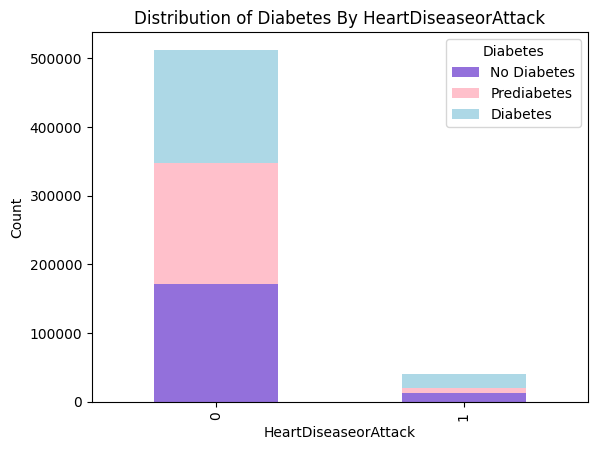

In [22]:
plot_target_distribution_per_feature("HeartDiseaseorAttack")

<Figure size 800x600 with 0 Axes>

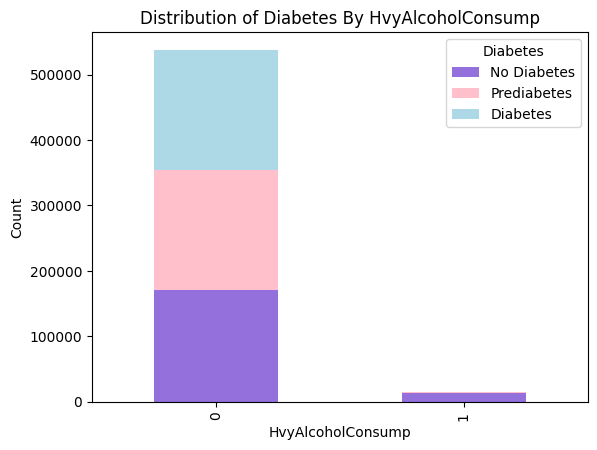

In [23]:
plot_target_distribution_per_feature("HvyAlcoholConsump")

<Figure size 800x600 with 0 Axes>

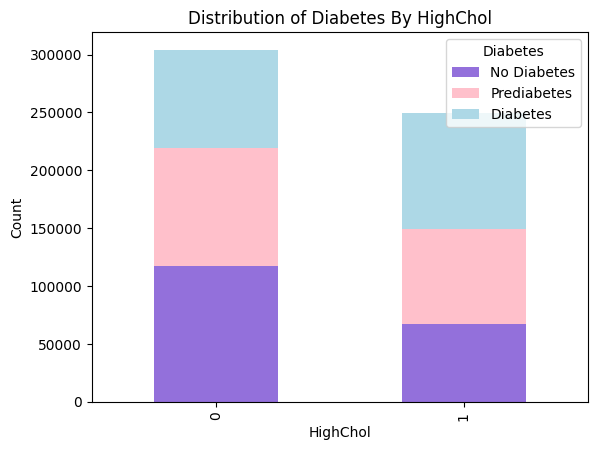

In [24]:
plot_target_distribution_per_feature("HighChol")

In [25]:
# Save the ADASYN dataset
df.to_csv("./processed_datasets/dataset_preprocessed_adasyn.csv", index=False)